In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('studentplacement_dataset(perceptron).csv')    

In [3]:
df.head()

,CGPA,Resume_Score,Placed
0,8.5,7.8,1
1,7.2,6.5,0
2,9.0,8.0,1
3,6.8,7.2,0
4,7.5,6.0,0


<Axes: xlabel='CGPA', ylabel='Resume_Score'>

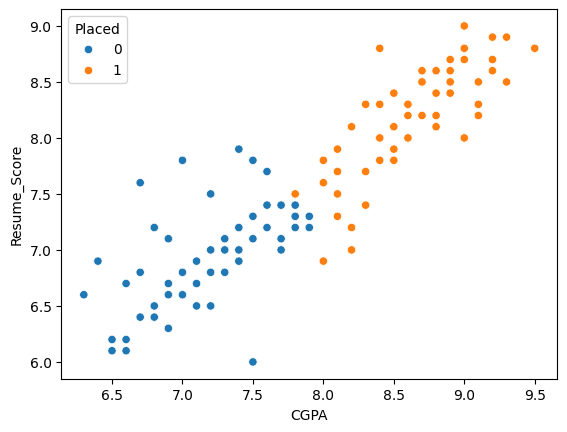

In [4]:
sns.scatterplot(data=df,x='CGPA',y='Resume_Score',hue = 'Placed')        #plotting actual data

In [5]:
# From dataset creating input and output columns
X = df.iloc[:,0:2].to_numpy()          
Y = df.iloc[:,-1].to_numpy()

In [6]:
'''creating perceptron function in which for each row we are predicting output z if for that particular row
   actual prediction(y) is different than z than we are updating the weights based on gradient descent approach'''
def perceptron(X,Y,epochs):
    lr = 0.01
    w1 = -50
    w2 = -50
    b  = -50

    for j in range(1,epochs):
        for i in  range(X.shape[0]):
            z = w1*X[i][0] + w2*X[i][1] + b
        
            if z*Y[i] < 0:
                w1= w1 + lr*Y[i]*X[i][0]
                w2= w2 + lr*Y[i]*X[i][1]
                b = b + lr*Y[i]
    return w1,w2,b

In [7]:
w1 ,w2,b = perceptron(X ,Y ,1000)
m = -(w1/w2)
c = -(b/w2)
print(m,c,w1,w2,b)


-3.0775305096911403 31.378320172288202 4.28700000000013 1.3930000000001206 -43.71000000000125


In [8]:
x_lim = np.linspace(6,10,200)
y_line = m* x_lim + c  #equation of line that seperates two regions


In [9]:
'''now based on weights that we got after training the model we are storing predicted values 
such that model has least errors'''

Z = []
for i in range(100):
    z = w1 * X[i][0] + w2 * X[i][1] + b
    if z > 0:
        z = 1
    else:
        z = 0
    Z.append(z)

y_hat = np.array(Z)    # Converting the list to a NumPy array with shape (100, 1)


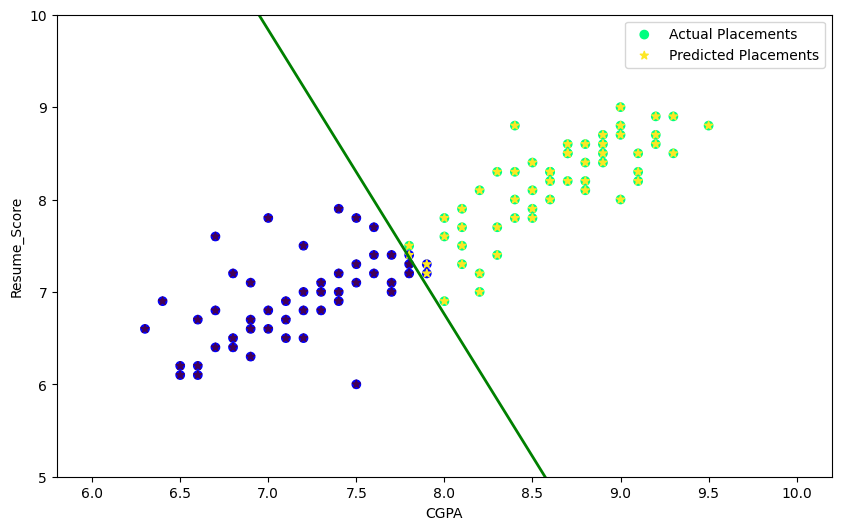

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_lim,y_line,color = 'Green',linewidth = 2)
plt.scatter(df['CGPA'], df['Resume_Score'], c= Y, marker = 'o', cmap='winter',label ='Actual Placements')
plt.scatter(df['CGPA'], df['Resume_Score'], c=y_hat, marker = '*', label ='Predicted Placements')
plt.ylim(5,10)
plt.xlabel('CGPA')
plt.ylabel('Resume_Score')
plt.legend()
plt.show()

In [11]:
'''1. The issue one can face while making such model is weight initialization as its a tedious task to assign 
correct initial weights. It depends on data here data which i choose has no negative values and if i choose weights that are all positive 
then z*Y[i] < 0 will not satisfy as z>0 and Y>0 ad weights will not update at all .so this is an trial and error method for single perceptron.

2. loss function for perceptron : L = (0 , -Y*z)
'''

'1. The issue one can face while making such model is weight initialization as its a tedious task to assign \ncorrect initial weights. It depends on data here data which i choose has no negative values and if i choose weights that are all positive \nthen z*Y[i] < 0 will not satisfy as z>0 and Y>0 ad weights will not update at all .so this is an trial and error method for single perceptron.\n\n2. loss function for perceptron : L = (0 , -Y*z)\n'